In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_excel('heart_disease.xlsx' , sheet_name='Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
print(data.dtypes)
print(data.isnull().sum())

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [ ]:
data['oldpeak'].fillna(data['oldpeak'].mean() , inplace=True)
data.isnull().sum()

<ipython-input-12-dd1b99c5a676>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['oldpeak'].fillna(data['oldpeak'].mean() , inplace=True)


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
#convert bool to integer
data['fbs'] = data['fbs'].astype(int)

In [ ]:
#convert all object columns to strings to avoid mixed types
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)

In [ ]:
#Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [ ]:
data.rename(columns={'num':'target'}, inplace =True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [ ]:
#split the dataset into fatures (X) and Target (Y)
X=data.drop(columns=['target']) #features
Y = data['target'] #Target

In [ ]:
print("\nFeatures (X) shape" , X.shape)
print("\nTarget (Y) shape" , Y.shape)


Features (X) shape (908, 12)

Target (Y) shape (908,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , random_state=42)

In [ ]:
print("\nTraining features (X_train) shape:", X_train.shape)
print("\nTraining features (X_test) shape:", X_test.shape)
print("\nTraining target (Y_train) shape:", Y_train.shape)
print("\nTraining target (Y_test) shape:", Y_test.shape)


Training features (X_train) shape: (635, 12)

Training features (X_test) shape: (273, 12)

Training target (Y_train) shape: (635,)

Training target (Y_test) shape: (273,)


In [ ]:
# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Evaluate the model
Y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [ ]:
print(f"\nAccuracy:{accuracy:.2f}")


Accuracy:0.50


In [ ]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       122
           1       0.44      0.45      0.45        82
           2       0.29      0.24      0.26        34
           3       0.22      0.29      0.25        28
           4       0.00      0.00      0.00         7

    accuracy                           0.50       273
   macro avg       0.33      0.33      0.33       273
weighted avg       0.51      0.50      0.50       273



In [ ]:
print("\nCConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


CConfusion Matrix:
 [[84 23  5  8  2]
 [24 37 11  8  2]
 [ 6  8  8 11  1]
 [ 4 13  2  8  1]
 [ 1  3  2  1  0]]


In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

In [ ]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

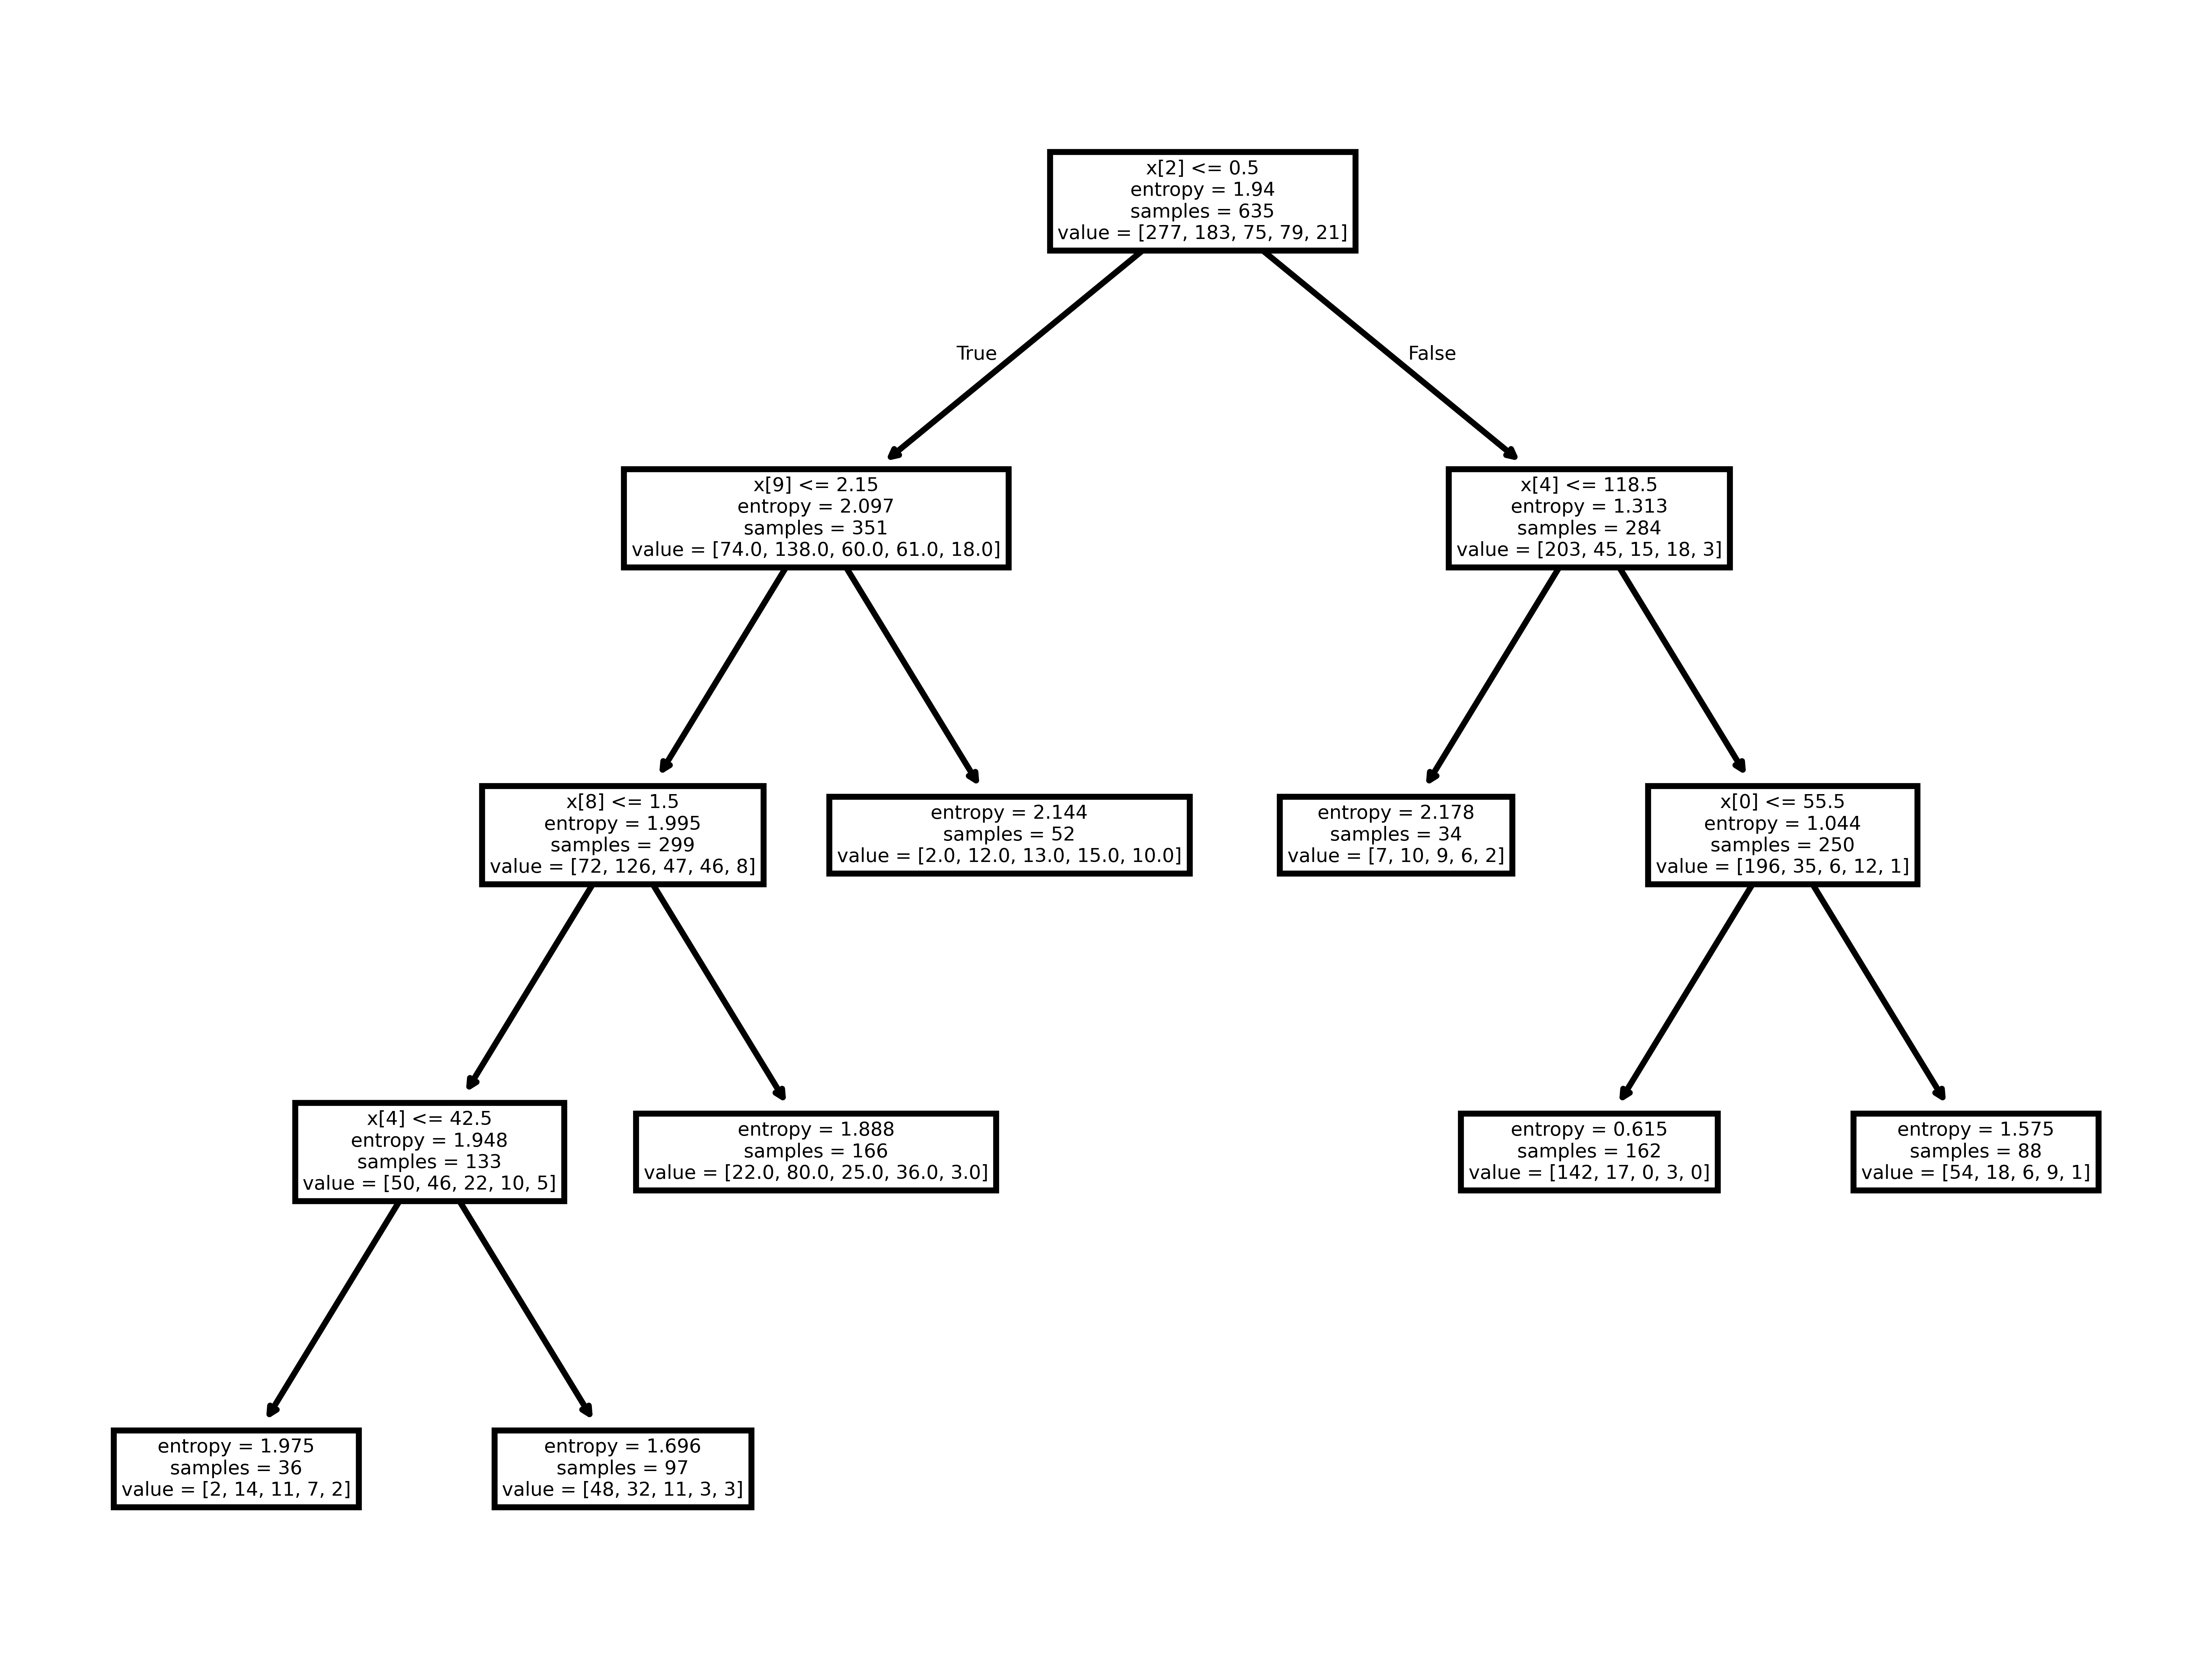

In [ ]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


In [ ]:
#Predicting on test data
preds = model.predict(X_test)
preds

array([1, 1, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       1, 1, 0, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 3])

In [ ]:
pd.Series(preds).value_counts()

,count
0,148
1,104
3,21


In [ ]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       122
           1       0.44      0.56      0.49        82
           2       0.00      0.00      0.00        34
           3       0.24      0.18      0.20        28
           4       0.00      0.00      0.00         7

    accuracy                           0.56       273
   macro avg       0.28      0.32      0.29       273
weighted avg       0.47      0.56      0.51       273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pred_train = model.predict(X_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       277
           1       0.44      0.57      0.50       183
           2       0.00      0.00      0.00        75
           3       0.29      0.19      0.23        79
           4       0.00      0.00      0.00        21

    accuracy                           0.57       635
   macro avg       0.29      0.33      0.30       635
weighted avg       0.47      0.57      0.51       635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Interview** **Questions**:

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**



Common Hyperparameters of Decision Tree Models and Their Effects

Decision trees are flexible models, but their performance can vary significantly based on how their hyperparameters are tuned. Some key hyperparameters include:

1. max_depth:  
 Effect: Controls how deep the tree can grow. Limiting the depth prevents overfitting, but setting it too low may lead to underfitting.

2. min_samples_split:  
 Effect: Defines the minimum number of samples required to split an internal node. Higher values lead to simpler trees, helping avoid overfitting, but too high might cause underfitting.

3.min_samples_leaf:  
Effect: Minimum number of samples needed at a leaf node. Increasing this number prevents the tree from creating small, noisy splits, improving generalization.

4. max_features:  
 Effect: Determines the maximum number of features to consider when making a split. Using fewer features can reduce overfitting but may limit model complexity.

5. criterion:  
 Effect: The function used to evaluate splits (e.g., "gini" or "entropy"). Affects how the tree grows by deciding the best way to split nodes.

6. **max_leaf_nodes**:  
 Effect: The maximum number of leaf nodes in the tree. Limiting this helps keep the tree from growing too complex and overfitting.

7. splitter:  
Effect: Controls how splits are chosen (either "best" or "random"). "Best" tends to give better results, while "random" might be faster for large datasets.

---
**2. What is the difference between the Label encoding and One-hot encoding?**




Difference Between Label Encoding and One-Hot Encoding

Label Encoding and One-Hot Encoding are two common techniques to convert categorical data into numerical data. Here’s how they differ:

Label Encoding:
How it works: Converts each category into a unique integer. For example, for the "Color" feature with values ["Red", "Green", "Blue"], label encoding might assign:
  - Red → 0
  - Green → 1
  - Blue → 2
Pros: Simple and efficient, especially when there is an ordinal relationship between categories.
Cons: May introduce a false ordinal relationship (e.g., "Green" might be seen as between "Red" and "Blue", which may not make sense).

One-Hot Encoding:
How it works: Creates a new binary column for each category. For the same "Color" feature, one-hot encoding would result in three columns:
  - Red → [1, 0, 0]
  - Green → [0, 1, 0]
  - Blue → [0, 0, 1]
Pros: Suitable for nominal data (no inherent order) and avoids introducing ordinal relationships.
Cons: Can result in a high-dimensional feature space, especially with many categories, leading to increased computational costs.

Key Differences:
Number of Columns: Label encoding uses one column, while one-hot encoding uses multiple columns (one for each category).
Suitability: Label encoding is better for ordinal data (where categories have a meaningful order). One-hot encoding is preferred for nominal data (where categories have no inherent order).
Interpretation: Label encoding treats categories as ordered integers, while one-hot encoding creates a sparse vector, ensuring no artificial order between categories.

